# Example 4
## Load toy Datasets and do some basic statistics
Lets try the linnerud toy dataset from scikit-learn. 

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from sklearn.datasets import load_linnerud
# from sklearn.model_selection import train_test_split
from pprint import pprint
import matplotlib.pyplot as plt
import math

In [3]:
df = load_linnerud(as_frame=True)
df_colms = df.keys()
print(df_colms)

dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


In [4]:
data = df.data
target = df.target
targetNames =df.target_names
features = df.feature_names
DESCR = df.DESCR
dataModule = df.data_module
data_filename = df.data_filename
target_filename = df.target_filename
frame = df.frame

In [5]:
frame.describe()

,Chins,Situps,Jumps,Weight,Waist,Pulse
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,9.450000,145.550000,70.30000,178.600000,35.400000,56.100000
std,5.286278,62.566575,51.27747,24.690505,3.201973,7.210373
min,1.000000,50.000000,25.00000,138.000000,31.000000,46.000000
25%,4.750000,101.000000,39.50000,160.750000,33.000000,51.500000
50%,11.500000,122.500000,54.00000,176.000000,35.000000,55.000000
75%,13.250000,210.000000,85.25000,191.500000,37.000000,60.500000
max,17.000000,251.000000,250.00000,247.000000,46.000000,74.000000


# The Middle

* Mean: Average $\mu = \sum_{i}^{n} \frac{x_{i}}{n}$
* Median: Middle. There are the same number of records before and after.
* Mode(s): Most common value(s).

In [13]:
print(f'{("Feature" + " "*10)[:11]} Mean   Sum/Size   Median      Mode(s)')
for feature in features + targetNames:
    colm = frame[feature]
    mode = '(' + str(colm.mode())
    mode = mode.replace('\nName', '  Name')[:mode.find("\nName")]
    mode = mode.replace('\n', ') , (') + ')'
    print(f'{(feature+" "*10)[:9]}', end=' | ')
    print(f' {round(colm.mean(), 1)}', end='  | ')
    print(f' {round(colm.sum()/colm.size, 1)}', end='   | ')
    print(f' {round(colm.median(), 1)}', end='     | ')
    print(f' {mode}')

Feature     Mean   Sum/Size   Median      Mode(s)
Chins     |  9.4  |  9.4   |  11.5     |  (0    12.0)
Situps    |  145.6  |  145.6   |  122.5     |  (0    101.0)
Jumps     |  70.3  |  70.3   |  54.0     |  (0    38.0) , (1    40.0) , (2    60.0)
Weight    |  178.6  |  178.6   |  176.0     |  (0    154.0) , (1    176.0) , (2    189.0) , (3    193.0)
Waist     |  35.4  |  35.4   |  35.0     |  (0    33.0)
Pulse     |  56.1  |  56.1   |  55.0     |  (0    50.0) , (1    52.0) , (2    56.0)


# Variability:

* Range

In [14]:
for feature in features+targetNames:
    colm = frame[feature]
    print(f'{feature}', end=' ')
    print(f'Range: [{colm.min()},{colm.max()}]')

Chins Range: [1.0,17.0]
Situps Range: [50.0,251.0]
Jumps Range: [25.0,250.0]
Weight Range: [138.0,247.0]
Waist Range: [31.0,46.0]
Pulse Range: [46.0,74.0]


* Standard Deviation: $\sigma = \sqrt{\sum_{i}^{n}{\dfrac{(x_{i}-\mu)^{2}}{n-1}}}$

In [15]:
for feature in features+targetNames:
    colm = frame[feature]
    print(f'{feature}', end=' ')
    print(f'SD: {round(colm.std(),2)}')
    

Chins SD: 5.29
Situps SD: 62.57
Jumps SD: 51.28
Weight SD: 24.69
Waist SD: 3.2
Pulse SD: 7.21


* Draw Histograms of Features to better understand data

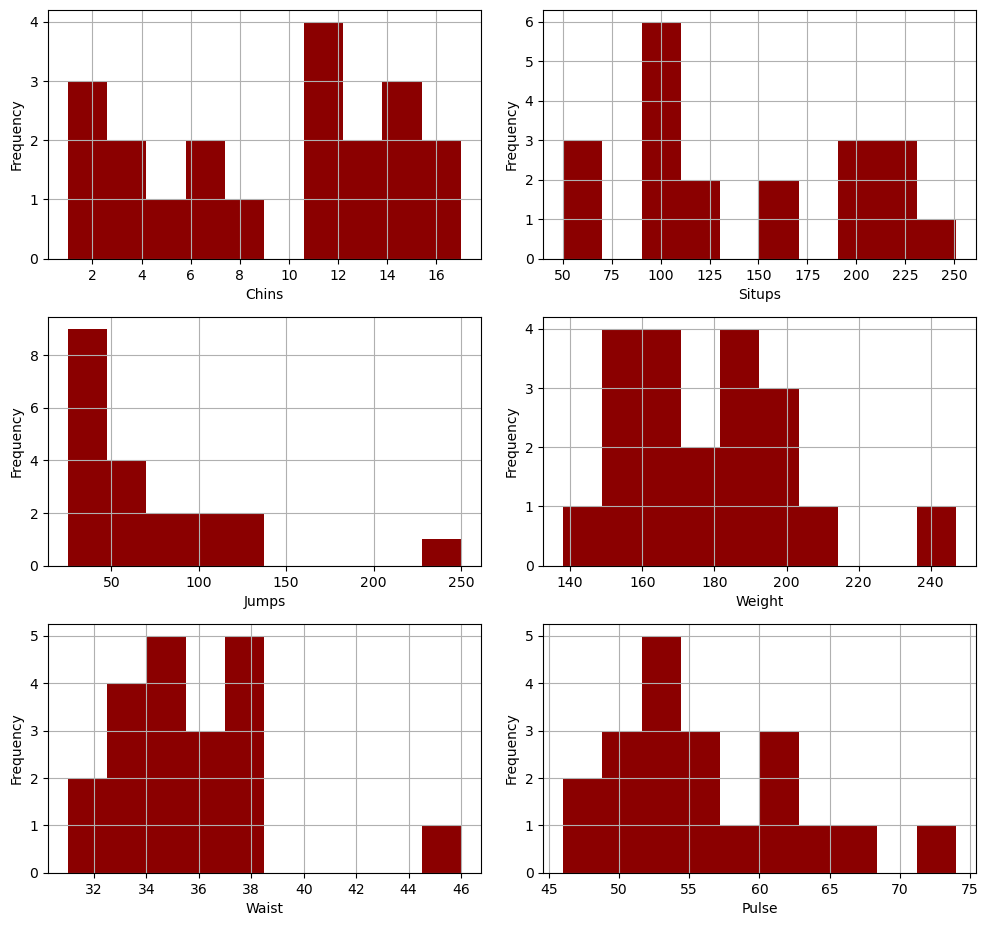

In [21]:
h =[]
nfeatures = len(features+targetNames)
f = plt.figure(figsize=(10,2*nfeatures))
for nth_feat, feature in enumerate(features+targetNames):
    plt.subplot(int(nfeatures/2)+1, 2, nth_feat+1)
    colm = frame[feature]
    hsub = h.append(colm.hist(color='darkRed'))
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
plt.close()

* Draw scatter plots of featurees to see correlations

<Figure size 3000x3000 with 0 Axes>

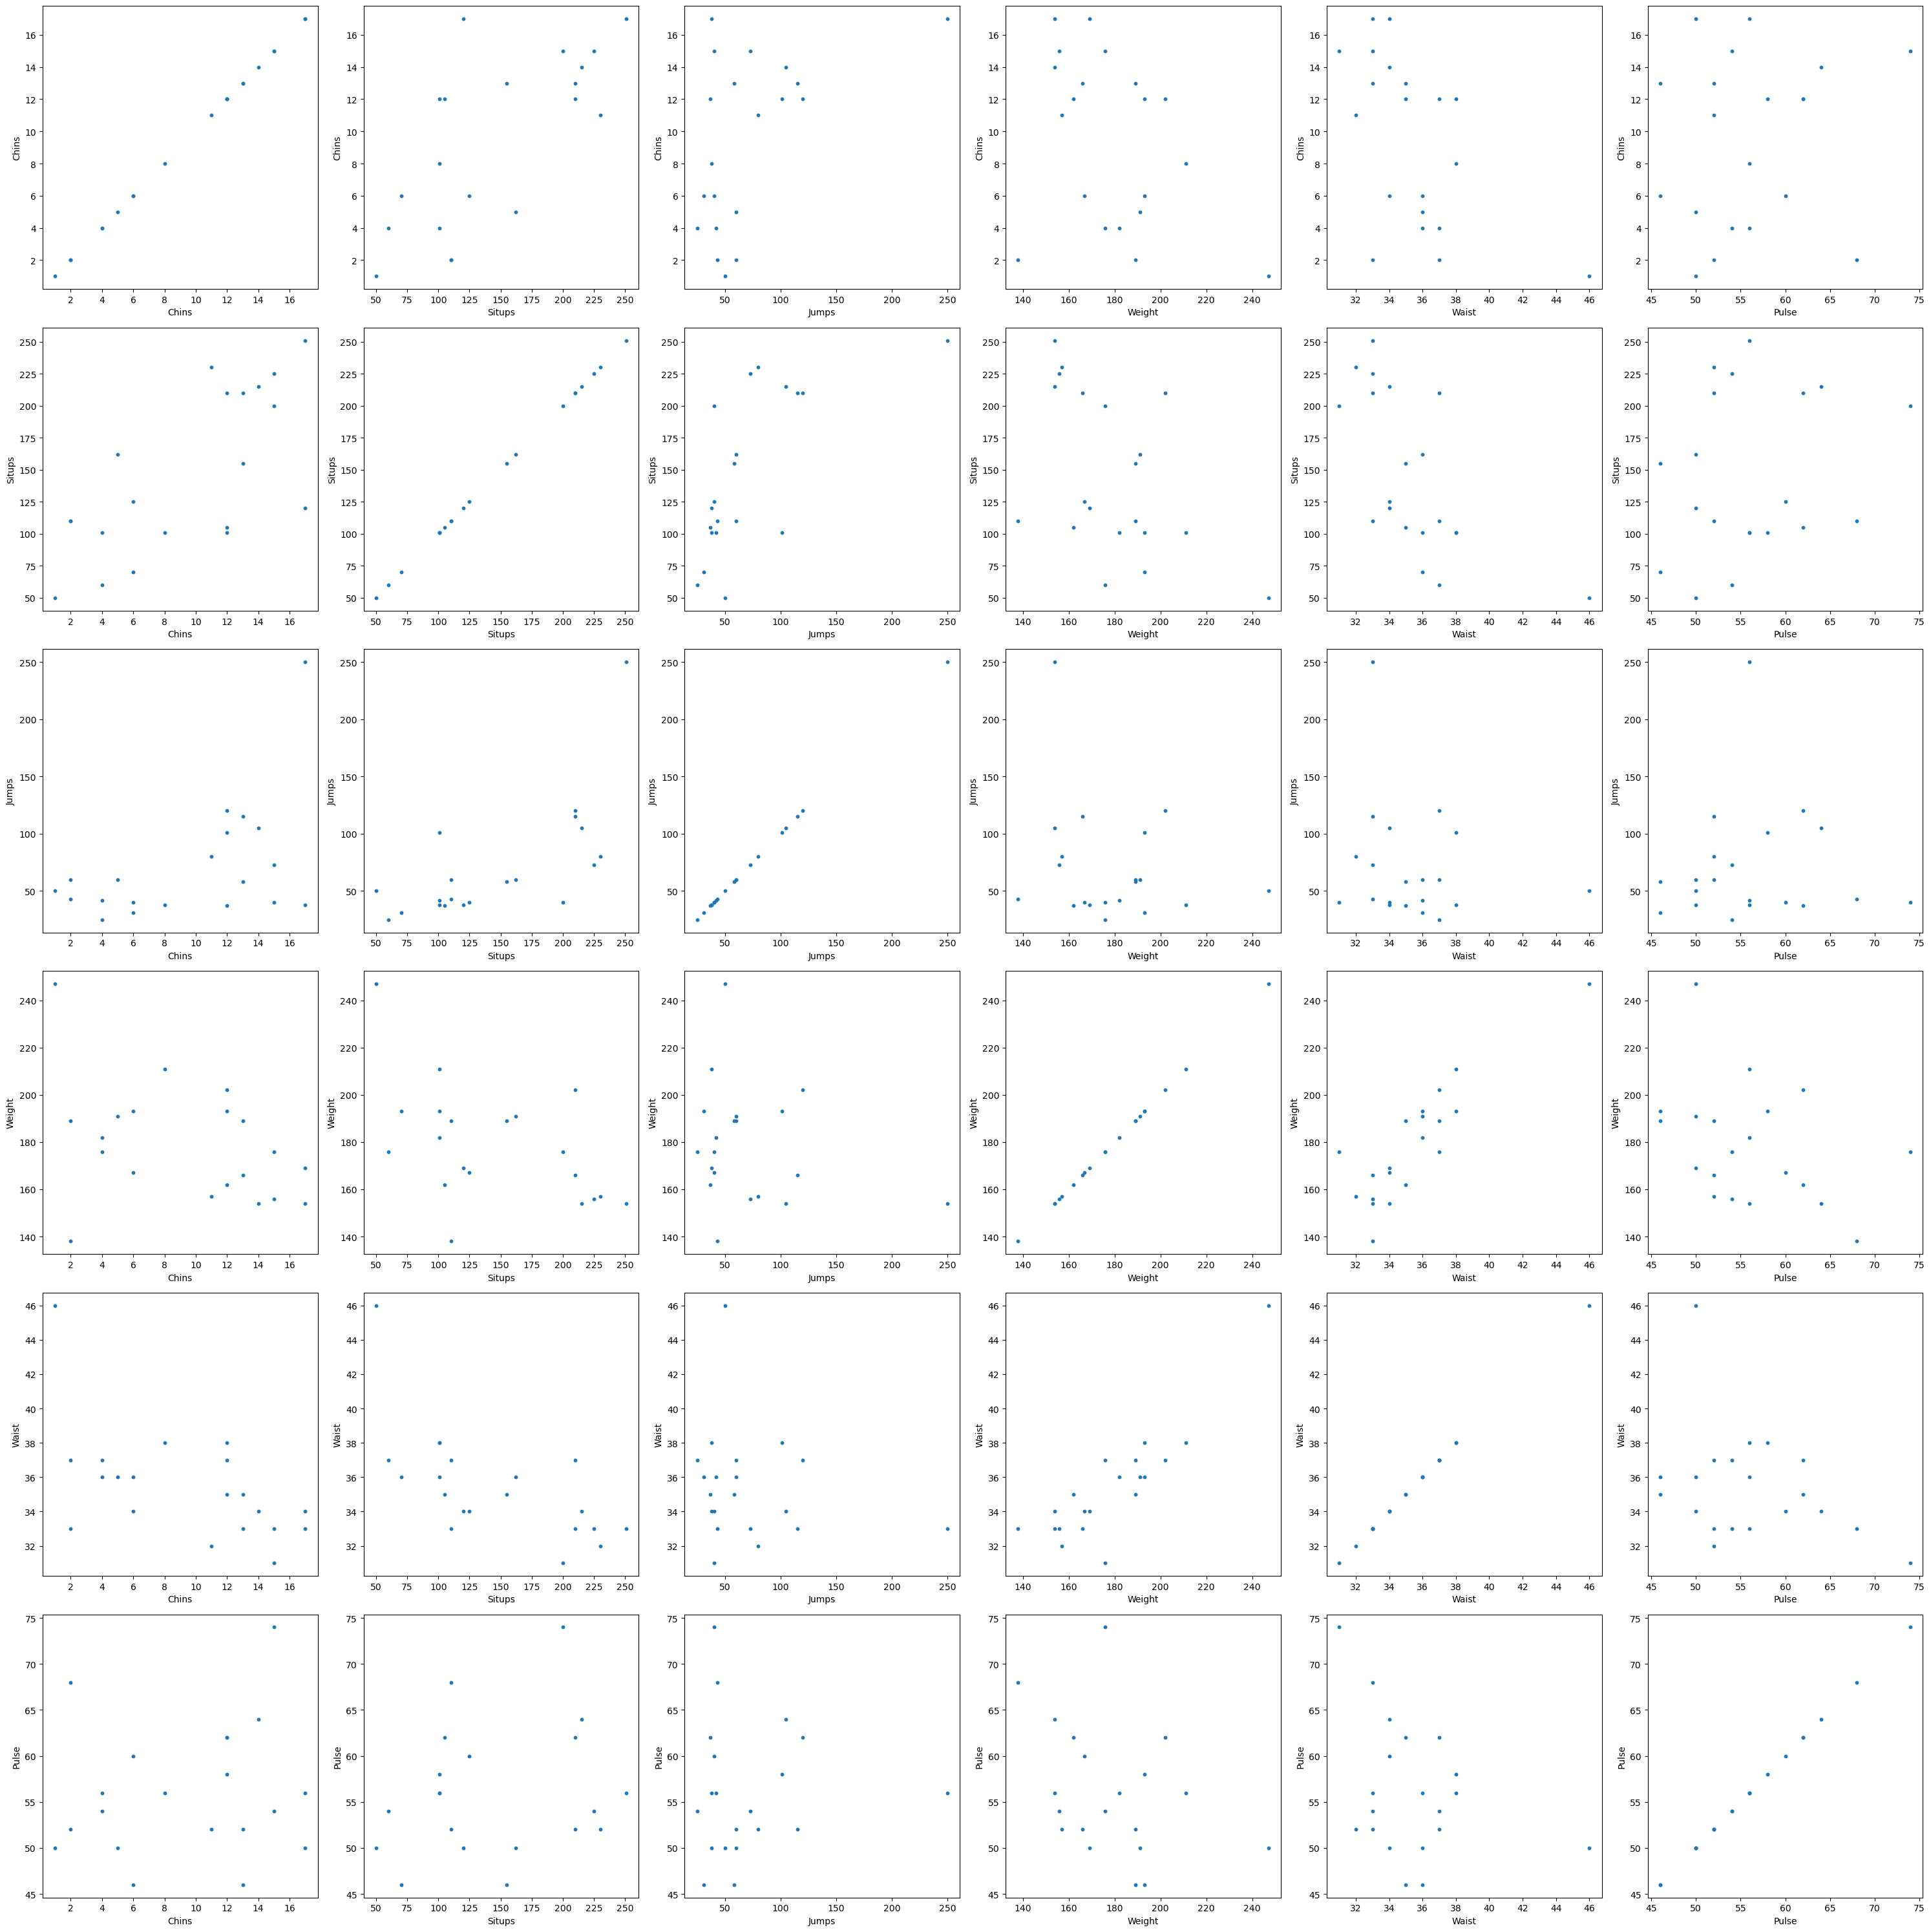

In [26]:
f = plt.figure(figsize=(5*nfeatures,5*nfeatures))
f, axes = plt.subplots(nfeatures, nfeatures, figsize=(5*nfeatures,5*nfeatures))
for nth_featVert, featureVert in enumerate(features+targetNames):
    for nth_feat, feature in enumerate(features+targetNames):
        axes[nth_featVert][nth_feat].scatter(x=frame[feature], y=frame[featureVert], s=10)
        axes[nth_featVert][nth_feat].set_xlabel(feature)
        axes[nth_featVert][nth_feat].set_ylabel(featureVert)
plt.tight_layout()
plt.show()
plt.close()